In [9]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('9_final_1.csv')
print(df.columns)
df = df.drop(columns = {'Unnamed: 0'})
print(df)

Index(['Unnamed: 0', 'humidity', 'rain', 'temperature', 'timestamp', 'hour',
       't_Delta', 'h_Delta', 'r_Delta'],
      dtype='object')
      humidity  rain  temperature  timestamp  hour  t_Delta  h_Delta  r_Delta
0         45.5   175         17.0     10.000    10      0.4     -1.7    -25.0
1         50.1   101         19.7     10.008    10      0.1      0.0     -2.0
2         75.3   107         10.1     10.016    10      0.2      0.4     -5.0
3         62.5   220          9.9     10.020    10      0.0      5.2      0.0
4         60.5   130          8.2     10.031    10      0.1      1.5     -2.0
...        ...   ...          ...        ...   ...      ...      ...      ...
1495      58.5   165         11.8      9.984    10      0.0     -0.6      5.0
1496      56.1   163         16.0      9.987    10      0.3     -0.9     11.0
1497      65.0   127          7.7      9.987    10      0.2      0.4      2.0
1498      57.2   104         12.6      9.990    10      0.3      0.6     -1.0
14

In [16]:
!pip install scipy

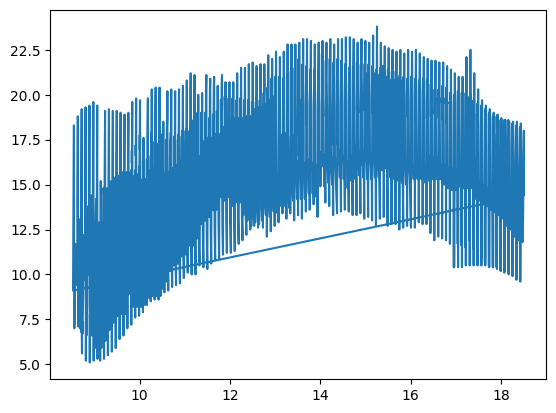

In [26]:
plt.plot(df['timestamp'], df['temperature'])
plt.show()

In [61]:
t_df = df.loc[df['hour'] == 9] 
x = np.array(df[['humidity', 'temperature', 'rain']])
y = np.array(df[['h_Delta']])
 
model = LinearRegression().fit(x,y)

r_sq = model.score(x, y)

arr = np.array([['humidity', 'temperature', 'rain']], dtype=object)

delta = model.predict(x)
print(delta)
delta = delta[0][0]   

[['humidity' 'temperature' 'rain']]
[[ 0.09530735]
 [-0.23133712]
 [-0.55007084]
 ...
 [-0.14098778]
 [-0.14476035]
 [-0.24692574]]


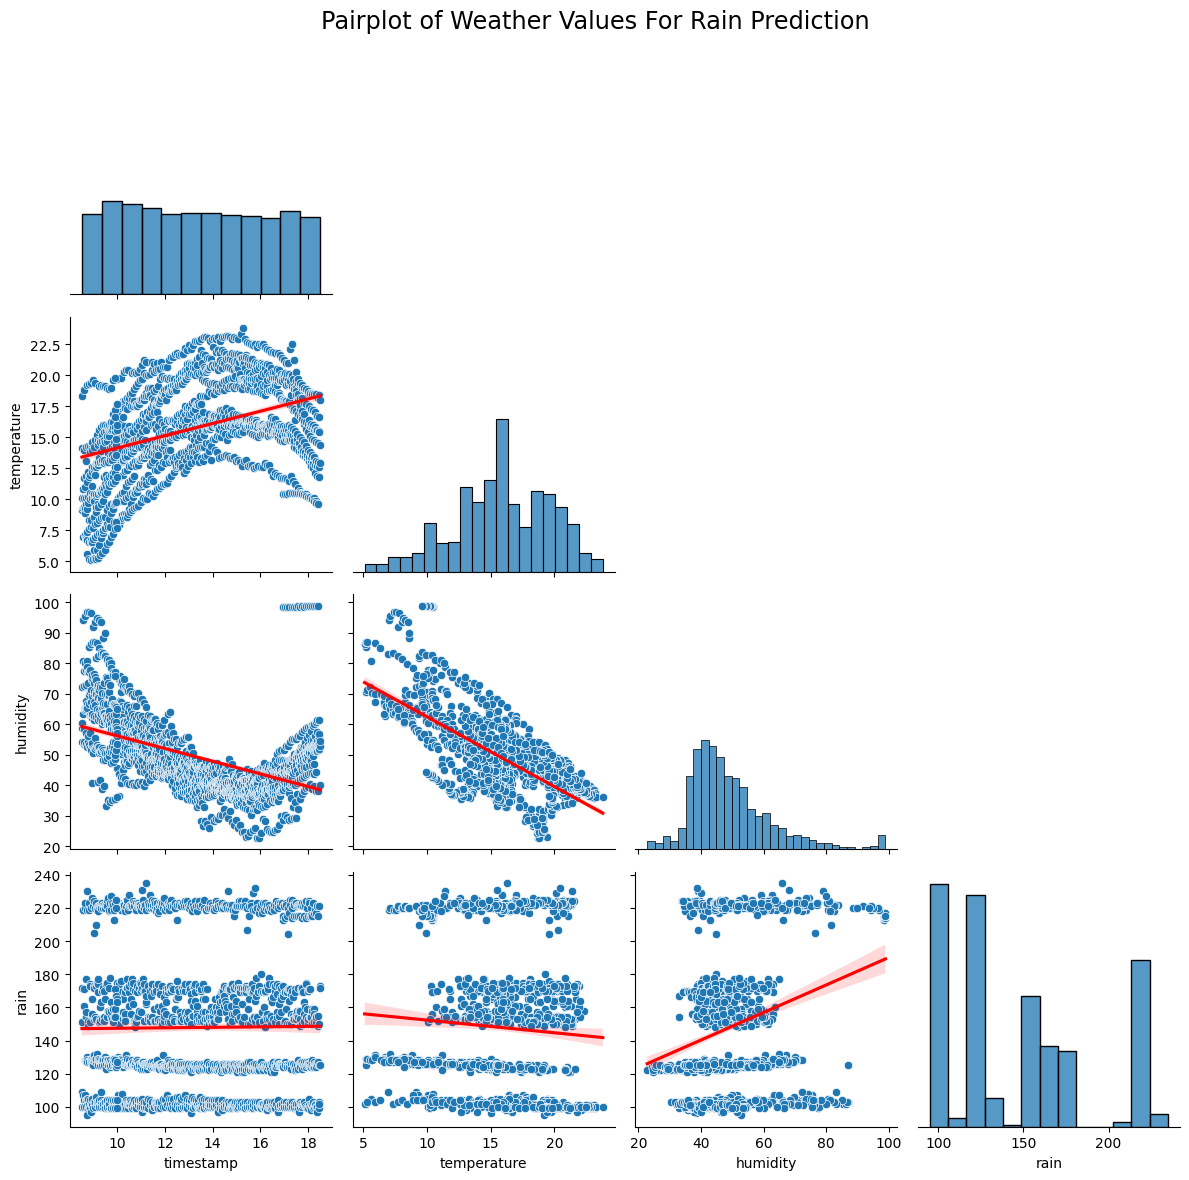

<Figure size 640x480 with 0 Axes>

In [108]:
import seaborn as sns
new_df = df[['timestamp', 'temperature','humidity', 'rain']].copy()
# print(new_df)
# sns.pairplot(data = new_df, height = 2, corner = True)  
# plt.show()
iris_pairplot = sns.pairplot(new_df, height=3, aspect=1, corner=True)#, kind="reg")
iris_pairplot.fig.suptitle("Pairplot of Weather Values For Rain Prediction", fontsize = "xx-large")

## Define function to plot a single regression line
def regline(x, y, **kwargs):
    sns.regplot(data=kwargs['data'], x=x.name, y=y.name, scatter=False, color=kwargs['color'])

## Call the function for each non-diagonal subplot within pairplot
iris_pairplot.map_offdiag(regline, color='red', data=new_df)

plt.savefig('summary.png')
plt.tight_layout()
plt.show()
plt.savefig('new_summary.png')

Pearson correlation coefficient matrix for each independent variable: 
              timestamp  temperature  humidity      rain
timestamp     1.000000     0.376633 -0.457540  0.009665
temperature   0.376633     1.000000 -0.661249 -0.068401
humidity     -0.457540    -0.661249  1.000000  0.257976
rain          0.009665    -0.068401  0.257976  1.000000


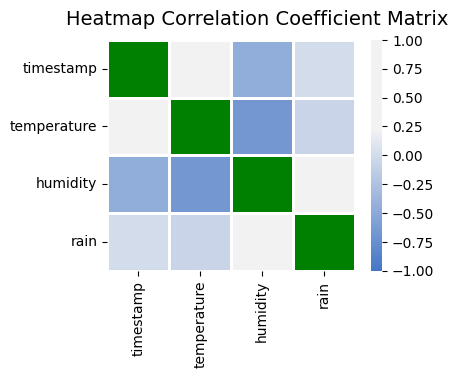

In [105]:
corr = new_df[['timestamp', 'temperature','humidity', 'rain']].corr()  
print('Pearson correlation coefficient matrix for each independent variable: \n', corr)  
  
# Masking the diagonal cells   
masking = np.zeros_like(corr, dtype = bool)  
np.fill_diagonal(masking, val = True)  
  
# Initializing a matplotlib figure  
figure, axis = plt.subplots(figsize = (4, 3))  
  
# Generating a custom colormap  
c_map = sns.diverging_palette(254, 0, as_cmap = True, sep = 100)  
c_map.set_bad('green')  
  
# Displaying the heatmap with the masking and the correct aspect ratio  
sns.heatmap(corr, mask = masking, cmap = c_map, vmin = -1, vmax = 1, center = 1, linewidths = 1)  
figure.suptitle('Heatmap Correlation Coefficient Matrix', fontsize = 14)  
axis.tick_params(axis = 'both', which = 'major', labelsize = 10)  
plt.savefig('coefficient.png')